# Juan Pablo Montenegro Erazo - CC1007778301

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas
2. Analizar que pasa con la regularaización.
3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.

# Solución

In [55]:
#1. Entrenar el modelo anterior para un numero mayor de caracteristicas
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
X = iris["data"] # Matriz de los valores numericos de los atributos
Y = iris["target"] # Vector de las clases, el 0 es una clase, el 1 otra y el 2 otra. Cada valor es la clase de una instancia

nombres_features = iris["feature_names"]
df = pd.DataFrame(X, columns = nombres_features)
df["Target"] = Y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [56]:
lista_particiones = train_test_split(X, Y, test_size = 0.3, random_state = 123, stratify = Y)

X_entrenamiento = lista_particiones[0]
X_test = lista_particiones[1]
Y_entrenamiento = lista_particiones[2]
Y_test = lista_particiones[3]

estimador_logistico = LogisticRegression(max_iter = 1000)
estimador_logistico.fit(X_entrenamiento, Y_entrenamiento)

exactitud_test = estimador_logistico.score(X_test, Y_test)

estimador_logistico = LogisticRegression(max_iter = 1000)
estimador_logistico.fit(X_entrenamiento, Y_entrenamiento)

exactitud_test = estimador_logistico.score(X_test, Y_test)

print(f"Exactitud promedio en entrenamiento: {estimador_logistico.score(X_entrenamiento, Y_entrenamiento)}")
print(f"Exactitud promedio en test: {exactitud_test}")

Exactitud promedio en entrenamiento: 0.9714285714285714
Exactitud promedio en test: 0.9777777777777777


In [57]:
estimador_logistico = LogisticRegression(max_iter = 1000)
estimador_logistico.fit(X_entrenamiento, Y_entrenamiento)

exactitud_test = estimador_logistico.score(X_test, Y_test)

print(f"Exactitud promedio en entrenamiento: {estimador_logistico.score(X_entrenamiento, Y_entrenamiento)}")
print(f"Exactitud promedio en test: {exactitud_test}")

Exactitud promedio en entrenamiento: 0.9714285714285714
Exactitud promedio en test: 0.9777777777777777


In [58]:
prediccion_logistica = estimador_logistico.predict(X_test)

print(f"Target real: {Y_test}")
print()
print(f"T. predicho: {prediccion_logistica}")

Target real: [1 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 1 2 0 2 1 1 2 1]

T. predicho: [1 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 2 2 0 2 1 1 2 1]


# 2.

Recordemos que la función de costo que se quiere minimizar usando la regularización es

$$J(\Theta) = \frac{1}{2m} (\Theta^{T} X - Y)^2 + \frac{\sigma^2}{\tau^2} \left| \Theta \right|^2$$

El metodo `LogisticRegression` permite usar esta función de costo cuando se le pasa como parametro `penalty = 'l2'`. Scikitlearn usa como parametro de regularización a $C = \frac{\tau^2}{\sigma^2}$, que es el inverso multiplicativo del coeficiente que acompaña a $\left| \Theta \right|^2$. Así pues, entre mayor sea $C$ menor es el efecto de la regularización.

En la siguiente celda de codigo se muestra una grafica en la que podemos ver que la regularización empeora nuestro modelo. Entre menor sea $C$, menor es tambien la precision del modelo. Esto significa que la complejidad del modelo de regresion logistica sin regularización beneficia al modelo, y el modelo es bastante rapido como para querer penalizar esta complejidad.

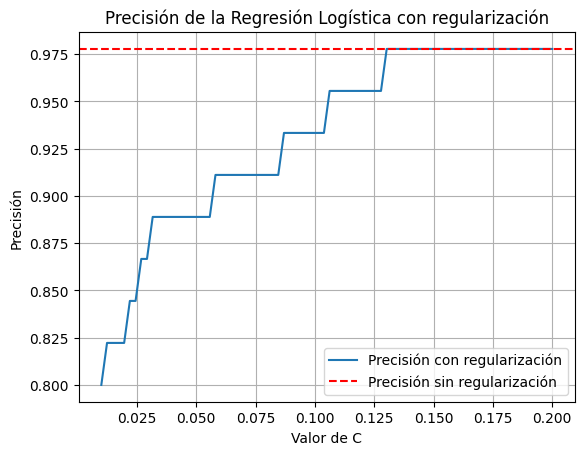

In [59]:
# 2. Analizar que pasa con la regularización

valores_C = np.linspace(0.01, 0.2, 80)
lista_scores = []

for parametro_regularizacion in valores_C:

    estimador_con_regularizacion = LogisticRegression(penalty = 'l2', C = parametro_regularizacion, solver = 'lbfgs')
    estimador_con_regularizacion.fit(X_entrenamiento, Y_entrenamiento)
    prediccion_logistica_con_regularizacion = estimador_con_regularizacion.predict(X_test)

    exactitud = estimador_con_regularizacion.score(X_test, Y_test)
    lista_scores.append(exactitud)


plt.plot(valores_C, lista_scores, label = "Precisión con regularización")
plt.axhline(y = exactitud_test, color = 'red', linestyle = '--', label = "Precisión sin regularización")
plt.xlabel("Valor de C")
plt.ylabel("Precisión")
plt.title("Precisión de la Regresión Logística con regularización")
plt.legend()
plt.grid(True)
plt.show()

# 3.

La grafica de la siguiente celda de codigo es la matriz de confusion de nuestro clasificador que usa regresion logistica. La diagonal de esta matriz nos muestra los aciertos del clasificador en las 3 categorias, y las otras entradas de la matriz nos muestran los fallos. Como se puede observar nuestro clasificador solo obtuvo un error en el set de prueba, lo que indica un gran rendimiento del modelo.

Despues graficamos las curvas de aprendizaje del modelo. Para esto usamos como puntajes la precision y el F1-score respectivamente. En ambos casos se evidencia el buen funcionamiento del modelo, pues generaliza bastante bien cuando se entrena con más de 100 datos de entrenamiento. El modelo no sufre de overfitting ni de underfitting para este rango de datos de entrenamiento. Esto lo sabemos debido a que el puntaje del modelo en el set de entrenamiento es muy similar al puntaje del set de prueba, y ambos puntajes son bastante altos.

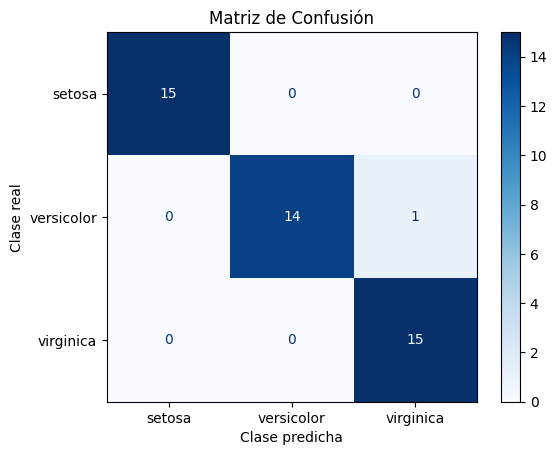

In [60]:
# 3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimador_logistico, X_test, Y_test, cmap = 'Blues', display_labels = iris["target_names"])
plt.title("Matriz de Confusión")
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.show()

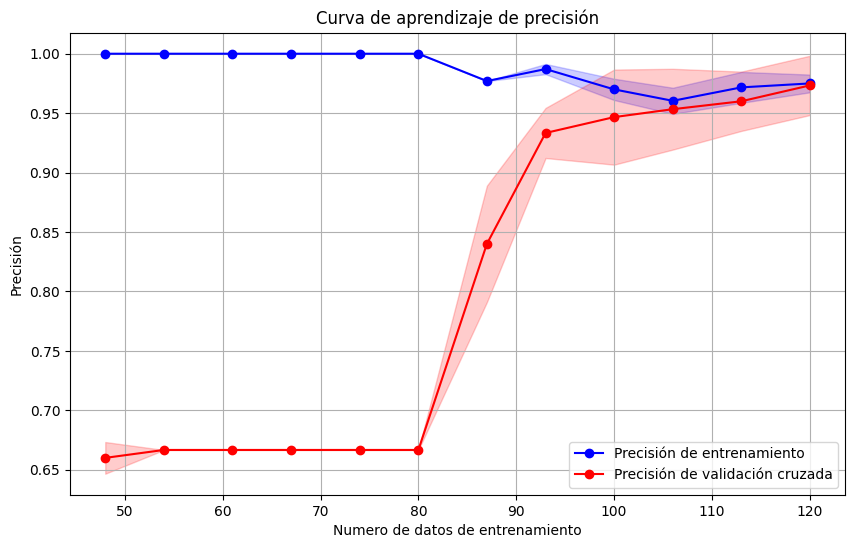

In [61]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

particiones = StratifiedKFold(n_splits = 5) # Balanceamos las particiones en cross-validation

lista_learning_curve = learning_curve(estimador_logistico, X, Y, cv=particiones, train_sizes=np.linspace(0.4, 1.0, 12), scoring='accuracy') # cv es el numero de particiones o plieges del k-fold cross-validation (es la k en este algoritmo)
train_sizes = lista_learning_curve[0]
train_scores = lista_learning_curve[1]
val_scores = lista_learning_curve[2]

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color = "b", label = "Precisión de entrenamiento")
plt.plot(train_sizes, val_mean, 'o-', color = "r", label = "Precisión de validación cruzada")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="r", alpha=0.2)

plt.title("Curva de aprendizaje de precisión")
plt.xlabel("Numero de datos de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

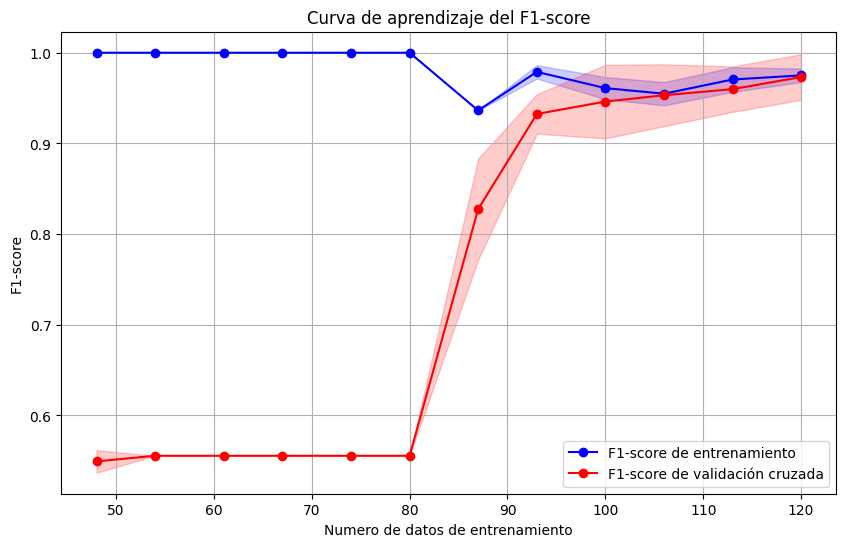

In [62]:
from sklearn.metrics import make_scorer, f1_score

puntaje_f1 = make_scorer(f1_score, average='macro')

lista_learning_curve = learning_curve(estimador_logistico, X, Y, cv=particiones, train_sizes=np.linspace(0.4, 1.0, 12), scoring = puntaje_f1) # cv es el numero de particiones o plieges del k-fold cross-validation (es la k en este algoritmo)
train_sizes = lista_learning_curve[0]
train_scores = lista_learning_curve[1]
val_scores = lista_learning_curve[2]

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color = "b", label = "F1-score de entrenamiento")
plt.plot(train_sizes, val_mean, 'o-', color = "r", label = "F1-score de validación cruzada")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="r", alpha=0.2)

plt.title("Curva de aprendizaje del F1-score")
plt.xlabel("Numero de datos de entrenamiento")
plt.ylabel("F1-score")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

In [63]:
# 4. Con base en el libro Hand on Machine learning, construir las fronteras de decisión para este multiclasificador.
from ipywidgets import interact, FloatSlider

def graficar_fronteras_decision(sepal_length, sepal_width):

    x_min = X[:, 2].min() - 1 # límites para la gráfica
    x_max = X[:, 2].max() + 1
    y_min = X[:, 3].min() - 1
    y_max = X[:, 3].max() + 1

    malla = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    malla_x = malla[0]
    malla_y = malla[1]

    # Cuadrícula para las predicciones, manteniendo los valores de sépalo fijos
    cuadricula = np.c_[np.full(malla_x.ravel().shape, sepal_length),
                       np.full(malla_y.ravel().shape, sepal_width),
                       malla_x.ravel(),
                       malla_y.ravel()]

    Z = estimador_logistico.predict(cuadricula)
    Z = Z.reshape(malla_x.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(malla_x, malla_y, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 2], X[:, 3], c=Y, s=40, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    plt.title(f"Fronteras de decisión para Sepal Length={sepal_length} y Sepal Width={sepal_width}")
    plt.show()

interact(graficar_fronteras_decision,
    sepal_length = FloatSlider(value=5.0, min=X[:, 0].min(), max=X[:, 0].max(), step=0.1, description="Sepal Length (cm)"),
    sepal_width = FloatSlider(value=3.0, min=X[:, 1].min(), max=X[:, 1].max(), step=0.1, description="Sepal Width (cm)"))

interactive(children=(FloatSlider(value=5.0, description='Sepal Length (cm)', max=7.9, min=4.3), FloatSlider(v…

<function __main__.graficar_fronteras_decision(sepal_length, sepal_width)>